# Ukraine war

Analyze Dutch tweets about the war in Ukraine that started on 24-02-2022.

Much of the code is copied from tweet-counts.ipynb

In [15]:
from datetime import datetime
import matplotlib.pyplot as plt
import os
import pandas as pd
import re

## Graphs

In [12]:
START_MONTH = "202202"
DATA_DIR = "../data/text/"
CSV_DIR = "csv/"
CSV_SUFFIX = ".csv"
TEXT = "text"
DUTCH = "nl"
IDSTR = "id_str"

In [9]:
def saveCounts(counts, topic):
    pd.DataFrame.from_dict(counts, orient="index").to_csv(CSV_DIR+topic+CSV_SUFFIX, header=False)

def combineDicts(a,b):
    return(dict(list(a.items())+list(b.items())))

def searchText(query, countsIn):
    countsOut = {}
    queryIn = query
    countsInKeys = [ str(x) for x in countsIn ]
    query2 = ""
    fileNames = sorted(os.listdir(DATA_DIR))
    selectedFileNames = [fileName for fileName in fileNames if fileName > START_MONTH ]
    for inFileName in selectedFileNames:
        date = inFileName[0:8]
        if re.search(r"2*z",inFileName) and not date in countsInKeys and inFileName > START_MONTH:
            if not date in countsOut: 
                countsOut[date] = 0
                print(date,query)
            df = pd.read_csv(DATA_DIR+inFileName,index_col=IDSTR)
            if query2 == "":
                countsOut[date] += len(df[df[TEXT].str.contains(query, flags=re.IGNORECASE)])
            else:
                countsOut[date] += len(df[df[TEXT].str.contains(query, flags=re.IGNORECASE) & 
                                          df[TEXT].str.contains(query2, flags=re.IGNORECASE)])
            if len(countsOut) > 0:
                countsSave = combineDicts(countsIn, countsOut)
                countsSave = {str(k):v for k, v in sorted(countsSave.items(), key=lambda item: str(item[0]))}
                saveCounts(countsSave, queryIn)
    if len(countsOut) == 0:
        countsSave = countsIn
    else:
        countsSave = combineDicts(countsIn, countsOut)
        countsSave = {str(k):v for k, v in sorted(countsSave.items(), key=lambda item: str(item[0]))}
        saveCounts(countsSave, queryIn)
    return(countsSave)

In [13]:
UKRAINE_QUERY = "oekraine|oekraïne"
counts = searchText(UKRAINE_QUERY, {})

20220201 oekraine|oekraïne
20220202 oekraine|oekraïne
20220203 oekraine|oekraïne
20220204 oekraine|oekraïne
20220205 oekraine|oekraïne
20220206 oekraine|oekraïne
20220207 oekraine|oekraïne
20220208 oekraine|oekraïne
20220209 oekraine|oekraïne
20220210 oekraine|oekraïne
20220211 oekraine|oekraïne
20220212 oekraine|oekraïne
20220213 oekraine|oekraïne
20220214 oekraine|oekraïne
20220215 oekraine|oekraïne
20220216 oekraine|oekraïne
20220217 oekraine|oekraïne
20220218 oekraine|oekraïne
20220219 oekraine|oekraïne
20220220 oekraine|oekraïne
20220221 oekraine|oekraïne
20220222 oekraine|oekraïne
20220223 oekraine|oekraïne
20220224 oekraine|oekraïne
20220225 oekraine|oekraïne
20220226 oekraine|oekraïne
20220227 oekraine|oekraïne
20220228 oekraine|oekraïne


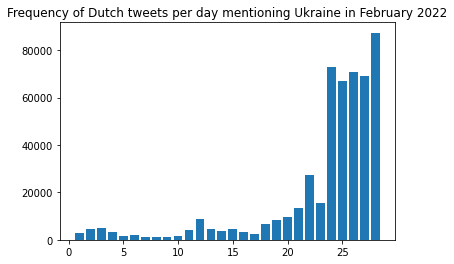

In [53]:
plt.bar([int(re.sub("202202", "", d)) for d in counts.keys()], counts.values())
plt.title("Frequency of Dutch tweets per day mentioning Ukraine in February 2022")
plt.savefig("ukraine-war.png")
plt.show()

## Wordclouds

In [32]:
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import TweetTokenizer

In [22]:
def show_wordcloud(term_frequencies):
    plt.figure(figsize=(30, 30))
    plt.imshow(term_frequencies, interpolation="bilinear")
    plt.axis("off")
    plt.savefig("wordcloud.png")
    plt.show()

In [23]:
stopwords = ("aan aangezien absoluut achter af afgelopen al algemeen alle alleen allemaal allen alles als alsnog alsof altijd ander andere anders "
"antwoord april art augustus basis beeld beetje begin beginnen begint begrijp behalve beide bekend belangrijk ben benieuwd bent bepaalde "
"beperkt best beste betekent beter betreft bezig bij bijna bijv bijvoorbeeld blijf blijft blijkbaar blijkt blijven boven bovendien brengen buiten buurt "
"buurten compleet daadwerkelijk daar daarbij daardoor daarmee daarna daarnaast daarom daarvan daarvoor dacht dag dagen dan dat de december deel denk "
"denken denkt deze dezelfde die dingen direct dit doe doen doet door doordat drie duidelijk dus duurt echt echte echter edit een eens eerder eerlijk eerst "
"eerste eigen eigenlijk eind eindelijk elk elkaar elke en ene enige enkel enkele enorm er erg ergens erger ervan ervoor etc even extra februari fijn flink fout "
"ga gaan gaat gebeuren gebeurt gebruik gebruiken gebruikt gedaan geef geeft geen gegaan gegeven gehad gehouden gek geldt geleden gelijk gelukkig gemaakt genoeg genomen geval "
"geven gevoel gevolgen geweest gewoon geworden gezegd gezien ging gisteren goed goede gooi gooien graag groep groot grootste  grote groter haar had hadden halen half hard heb hebben "
"hebt heeft heel heen helaas hele helemaal helpt hem hen het hetzelfde hier hij hoe hoeft hoeveel hoeveelheid hoeven hoger hoog hoop hoor hopelijk hopen horen hou houd houden "
"houdt https huidige hun idee ieder iedere iedereen iemand iets ik in inderdaad ineens informatie ingevoerd inmiddels ipv is ivm ja januari jaren je jezelf jij jonge "
"jou jouw juist juli jullie juni kan kans kant keer kijk kijken klaar klein kleine klinkt klopt kom komen komende komt kon kreeg krijg krijgen krijgt kun kunnen "
"kunt kwam laag laat laatste land landen lang lange langer langs last lastig laten later leer lees lekker letterlijk leven lezen liever liggen ligt lijken lijkt "
"logisch loopt lopen los m'n maak maakt maand maar maart mag maken makkelijk makkelijker man manier me mee meer meerdere meest meeste mei men mensen met "
"meteen middel mij mijn minder misschien mocht moeilijk moest moet moeten mogelijk mogen moment momenteel morgen na naar naast namelijk "
"natuurlijk nauwelijk nauwelijks nederland nederlander nederlanders nederlandse nee neem neemt nemen nergens net niemand niet niets nieuw nieuwe niks nl no "
"nodig nog nogal nooit normaal normale nou november nu of ofzo oktober om omdat on ondanks onder ondertussen ongeveer ons onze ooit ook op openlijk open over overal "
"overigens pa paar pakken pas per persoonlijk plek plekken praten precies prima probeer proberen punt qua raken redelijk relatief rest roepen rond rt samen september serieus simpelweg "
"sinds slechts snap snel sneller som sommige soms soort sowieso staan staat steed steeds stel stellen sterk strak straks stuk te tegen ten terecht terug "
"terwijl teveel the tijd tijden tijdens to toch toe toen tot totaal trouwens tussen twee u uit uiteindelijk uiteraard uur uw vaak vaker vallen valt van vanaf vandaag vanuit vanwege "
"vast vd veel velen ver verder verhaal verkeerd verplicht verschil verschillende vertrouwen vervolgens verwacht verwachten via vind vinden vindt voelt vol "
"voldoende volgen volgende volgens volledig vond voor vooral voorbij voordat voorkomen vorige vraag vrij vrijdag vrijwel vroeg vs waar waarbij waardoor waarin waarom "
"waarschijnlijk waarvan wachten wanneer want waren was wat we week weer weet weg weinig wel welke wellicht werd werden werken werkt weten wie wij wil willen "
"wilt woord word worden wordt x200b z'n zag zal zat ze zeer zeg zeggen zegt zei zeker zelf zelfs zetten zich zichzelf zie zien ziet zij zijn zin zit zitten zo zo'n "
"zoal zoals zodat zodra zoeken zolang zonder zorgen zorgt zou zouden zoveel zover zowel zullen zwaar één"
)

In [24]:
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white", width=600, height=300, collocations=False, normalize_plurals=False, relative_scaling=1, regexp=r"\w[\w']+",
                      stopwords=(stopwords).split())

In [25]:
NBR_OF_TOKENS = 200

def make_wordcloud(posts, nbr_of_tokens=NBR_OF_TOKENS):
    text = " ".join(posts)
    text = re.sub(r'\\n', ' ', text)
    token_freqs = Counter(tokenize(text.lower()).split())
    top = [(t,token_freqs[t]) for t in sorted(token_freqs.keys(),key=lambda t:token_freqs[t], reverse=True) 
                              if t not in stopwords.split() and re.search("[a-z]", t) and len(t) > 1]
    show_wordcloud(wordcloud.generate_from_frequencies(dict(top[:NBR_OF_TOKENS])))
    return top

In [26]:
def get_position(top, token_filter):
    for i in range(0, len(top)):
        if re.search(token_filter, top[i][0]):
            print(f"{i+1}. {top[i][1]} {top[i][0]}")

In [27]:
def tokenize(text):
    return(" ".join(TweetTokenizer().tokenize(text)))

In [30]:
def get_posts(query, date_pattern):
    file_names = sorted(os.listdir(DATA_DIR))
    selected_file_names = [file_name for file_name in file_names if re.search(date_pattern, file_name) ]
    posts = []
    for file_name in selected_file_names:
        df = pd.read_csv(DATA_DIR + file_name, index_col=IDSTR)
        posts.extend(list(df[df[TEXT].str.contains(query, flags=re.IGNORECASE)].loc[:,TEXT]))
    return posts

In [38]:
stopwords += " oekraine oekraïne"

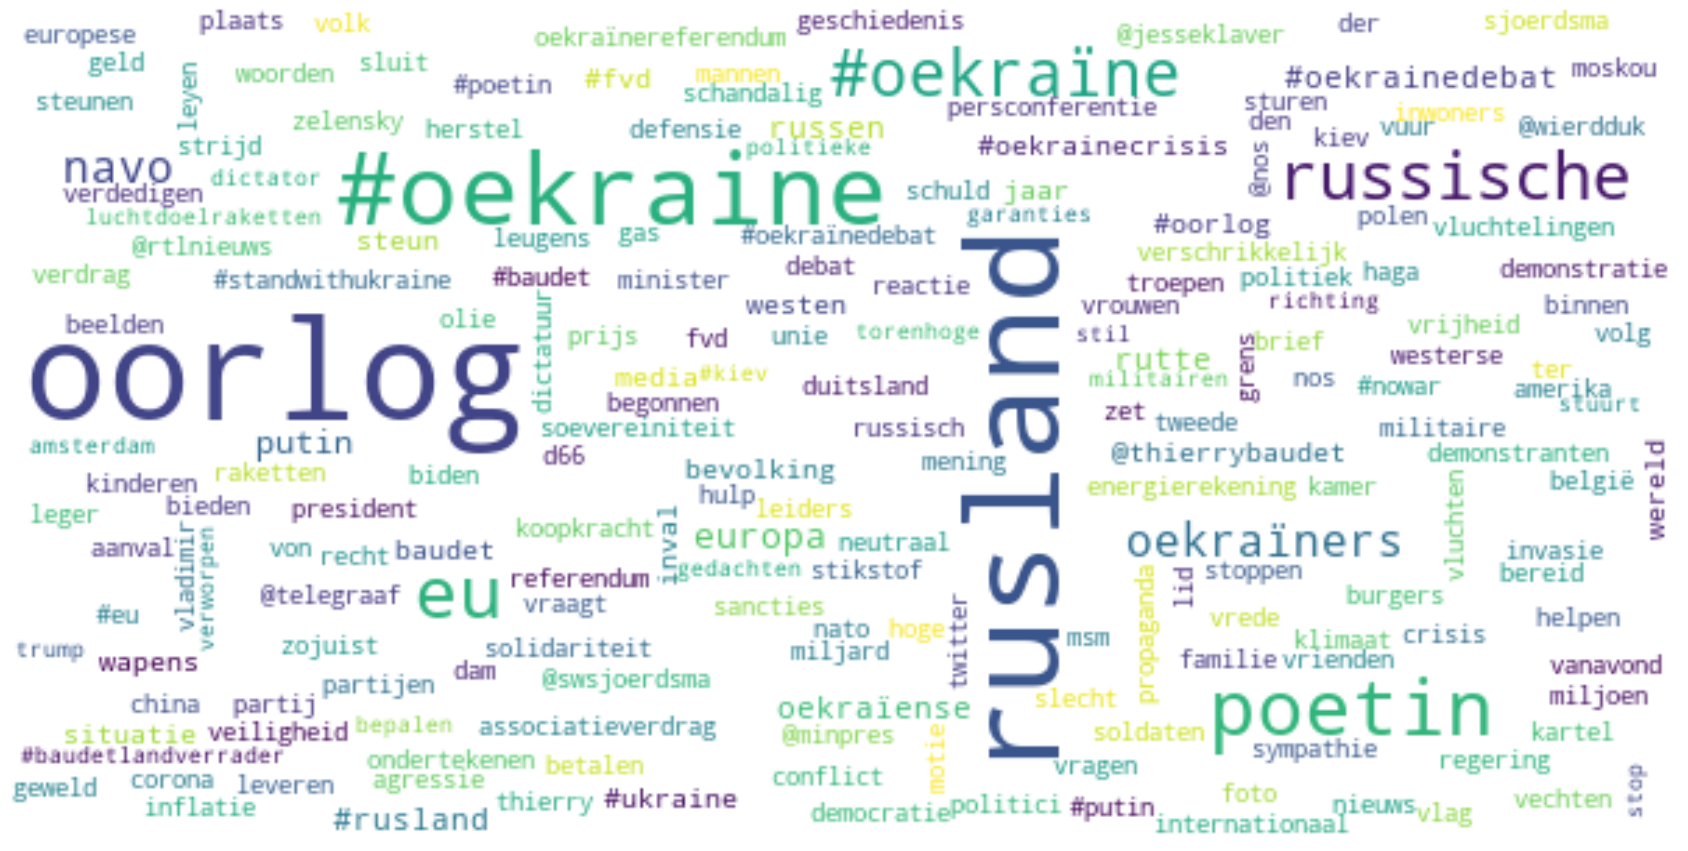

In [40]:
posts = get_posts(UKRAINE_QUERY, r"^2022022[4-8]")
top = make_wordcloud(posts)

## Examples of tweets

In [51]:
file_names = sorted(os.listdir(DATA_DIR))
text_seen = {}
for file_name in file_names:
    if file_name > "20220228":
        df = pd.read_csv(DATA_DIR+file_name,index_col=IDSTR)
        for text in df[df[TEXT].str.contains(UKRAINE_QUERY, flags=re.IGNORECASE) & df[TEXT].str.contains("mag", flags=re.IGNORECASE)]["text"]:
            if text not in text_seen:
                print(text)
                text_seen[text] = True

Als Oekraïne buffer blijft zonder Amerikaanse inmenging en zonder NAVO invloed komt er geen woiii.\nMaar #Zelensky mag van Amerika dit niet toegeven. Amerika is hier oorzaak en wil totaal macht ten koste van VEILIGHEID #EU
@op1npo @SigridKaag Ik ben van mening dat Nederland al genoeg offers heeft gebracht in een oorlog die niet de onze is. #MH17 \n\nGeef die Poetin geen reden om ook wat kernkoppen deze kant op te sturen. \n\nMevr. Kaag mag zich uiteraard vrijwillig melden bij 1 vd 'burgerinitiatieven' in Oekraïne.
.@SigridKaag mag zich vannacht al voorbereiden want reken er maar op dat @PieterOmtzigt morgen met vragen komt over de defensiebegroting. Ik ga sowieso kijken! \n#TweedeKamer #Oekraine #Op1npo https://t.co/Q4VD4Q2Xp5
@AfshinEllian1 Afshin heeft mijn ander account geblockt. Putin zei al een klein decenium hou Oekraine neutraal of het is ellende.\n\nHet westen in zijn narcisme wil weer een land roven voor zijn levenswijze opdringen. Hoe hoog moet het berg met lijken nog worden?